<a href="https://colab.research.google.com/github/MyHackInfo/Tensorflow/blob/master/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Basic Syntax

In [0]:
import tensorflow as tf

In [0]:
n1 = tf.constant(2)    # Use for crate constant value like int , string
n2 = tf.constant(5)
n3 = n1 + n2
print(n3)              # Simple in tensorflow we dont add two value directly

Tensor("add_3:0", shape=(), dtype=int32)


In [0]:
# Here we create Session that help run code with its we can not run code
with tf.Session() as sess:
  result = sess.run(n3)
  

In [0]:
# Here use sess for print output
print(result)

7


In [0]:
# tf.__version__ are use for show which v we use tf
print(tf.__version__)

1.14.1-dev20190301


In [0]:
hello = tf.constant("hey")
world = tf.constant("world")

In [0]:
# type funtion use for know what type of data is it.
type(hello)

tensorflow.python.framework.ops.Tensor

In [0]:
print(hello)

Tensor("Const_2:0", shape=(), dtype=string)


In [0]:
with tf.Session() as sess:
  result = sess.run(hello + world)

In [0]:
print(result)

b'heyworld'


In [0]:
with tf.Session() as sess:
  result = sess.run(hello + world)
  print(result)

b'heyworld'


In [0]:
# .get_shep() function show dimension of tensor
a = tf.constant([[12,23,],[23,55]])
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

# TensorFlow Graphs
  > What is Graphs: >
   * Graphs are sets of connected nodes (vertices).
   * The connections are referred to as edges.
   * In TensorFlow each node is an operation with possible inputs that can supply some output 



In [0]:
n1 = tf.constant(2)
n2 = tf.constant(1)
n3 = n1 + n2


In [0]:
with tf.Session() as sess:
  result = sess.run(n3)

In [0]:
print(result)

3


In [0]:
print(tf.get_default_graph())   #Default Graph

In [0]:
g = tf.Graph()                  #New Graph

In [0]:
print(g)

In [0]:
graph_1 = tf.get_default_graph()     #Default Graph 1
print(graph_1)

In [0]:
graph_2 = tf.Graph()                #New Graph  2
print(graph_2)

In [0]:
# Set graph_2 as Default graph
with graph_2.as_default():
  print(graph_2 is tf.get_default_graph())

True


In [0]:
type(graph_1)

tensorflow.python.framework.ops.Graph

# Variables and Placeholders

There are two main types of tensor objects in a Graph:
*   Variables
*   Placeholders



## Variables
* Variables can hold the values of weights and biase throughout the session.
* variables need to be initialized

## Placeholders
* Placeholders are initially empty and are used to feed in the actual training examples.






In [0]:
sess = tf.InteractiveSession()    # First create interactive session using this command

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1717: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
my_tensor = tf.random_uniform((4,4),0,1)
my_tensor


<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [0]:
my_var = tf.Variable(initial_value=my_tensor)
print(my_var)

<tf.Variable 'Variable_1:0' shape=(4, 4) dtype=float32_ref>


In [0]:
# sess.run(my_var)    # Solve this error initialized Variable

In [0]:
init = tf.global_variables_initializer()   # This way we init the my_var 
sess.run(init)

In [0]:
sess.run(my_var)

array([[0.7593502 , 0.3693154 , 0.85505104, 0.1971718 ],
       [0.9601387 , 0.17372513, 0.33477795, 0.6416447 ],
       [0.11215317, 0.16667879, 0.9351629 , 0.90489376],
       [0.58427227, 0.7476152 , 0.19983375, 0.9096724 ]], dtype=float32)

In [0]:
ph = tf.placeholder(tf.float32, shape=(None,5))    # This way we create placeholder 

# A Neural Network

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
np.random.seed(101)
tf.set_random_seed(101)

In [4]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [5]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [0]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [0]:
add_op = a+b
mul_op = a*b

In [13]:
with tf.Session() as sess:
  add_result = sess.run(add_op, feed_dict={a:2,b:3})
  print(add_result)
  print("\n")
  mul_result = sess.run(mul_op, feed_dict={a:rand_a,b:rand_b})
  print(mul_result)

5.0


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Example Neural Network

In [0]:
n_features = 10
n_dense_neurons =3


In [0]:
x = tf.placeholder(tf.float32,(None,n_features))

In [0]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [0]:
xW = tf.matmul(x,W)


In [0]:
z = tf.add(xW , b)

In [0]:
a = tf.sigmoid(z)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  layer_out=sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [25]:
print(layer_out)

[[0.85108185 0.96213835 0.9830819 ]]


# Simple Regression Example

In [26]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [27]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

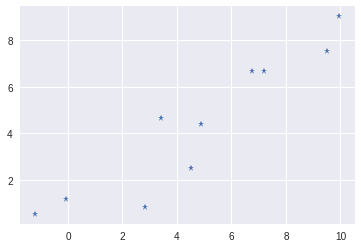

In [35]:
plt.plot(x_data,y_label,'*')

y = mx + b

In [37]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [0]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [0]:
error = 0
for x,y in zip(x_data, y_label):
  y_hat = m * x +b
  
  error += (y-y_hat)**2

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  training_steps =100
  for i in range(training_steps):
    sess.run(train)
    
  final_slope , final_intercept = sess.run([m,b])

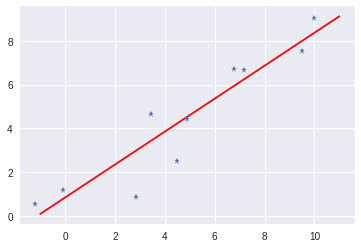

In [45]:
x_test = np.linspace(-1,11,10)

# y =mx +b
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot,'r')
plt.plot(x_data,y_label,'*')